*Capping is called Winsorization when used percentile*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

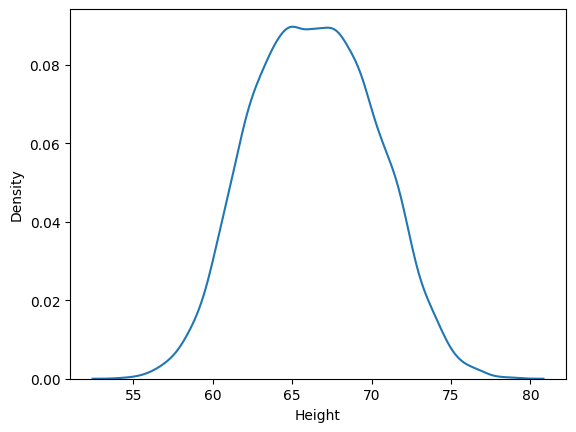

In [6]:
sns.kdeplot(df['Height'])

<Axes: ylabel='Height'>

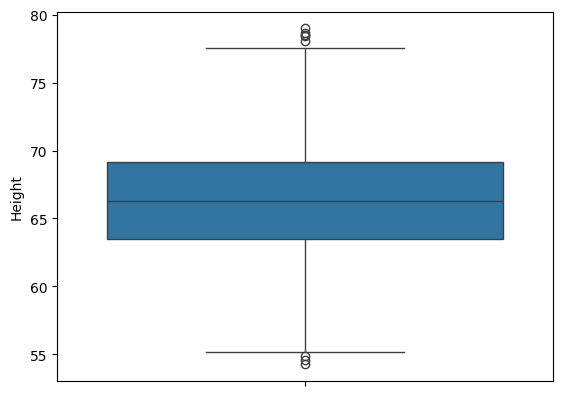

In [7]:
sns.boxplot(df['Height'])

In [8]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [9]:
upper_limit, lower_limit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

In [15]:
new_df =df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

In [17]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

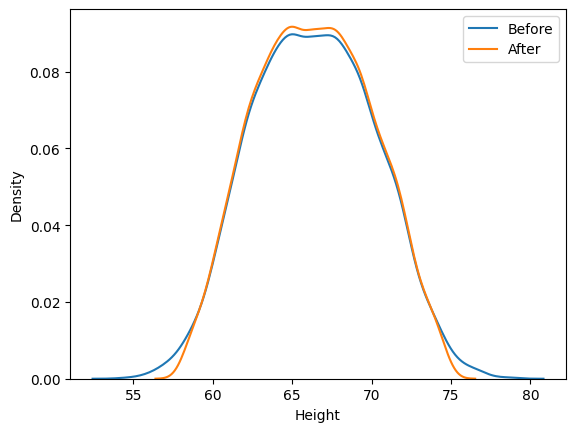

In [21]:
sns.kdeplot(df['Height'])

sns.kdeplot(new_df['Height'])

plt.legend(['Before', 'After'])

<Axes: ylabel='Height'>

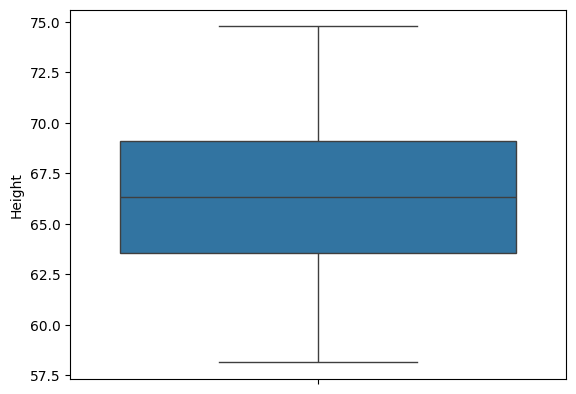

In [23]:
sns.boxplot(new_df['Height'])

In [27]:
# Winsorization
df['Height']= np.where(
    df['Height'] >= upper_limit,
    upper_limit,
    np.where(
        df['Height'] <= lower_limit,
        lower_limit,
        df['Height']
    )
)

In [28]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [29]:
df.shape

(10000, 3)

<Axes: ylabel='Height'>

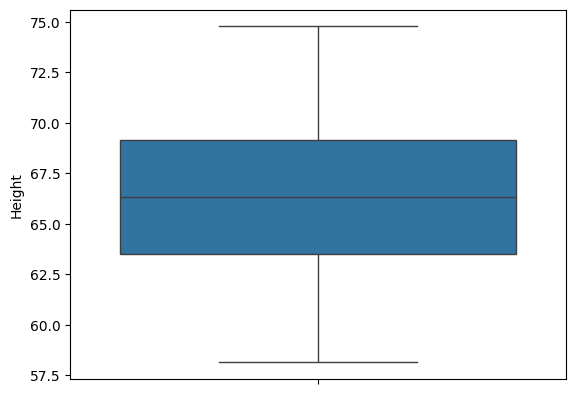

In [30]:
sns.boxplot(df['Height'])

In [31]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.366281,161.440357
std,3.795717,32.108439
min,58.134412,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,74.785790,269.989699
